In [42]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\treyg\anaconda3\lib\site-packages (0.0)


In [43]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [44]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [45]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [66]:
# Set features. This will also be used as your x values.
target = df["koi_disposition"]
data = df.drop("koi_disposition", axis=1)
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [48]:
y = df["koi_disposition"]
X = df.drop(columns=["koi_disposition"])

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [78]:
X_train.head()

,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5537,0,0,0,0.849861,0.000019,-0.000019,132.05470,0.03150,-0.03150,1.260,...,-102,3.949,0.604,-0.325,1.676,1.025,-0.839,291.10974,47.615490,14.319
1194,0,0,0,40.809573,0.000094,-0.000094,142.69218,0.00200,-0.00200,0.949,...,-134,4.301,0.066,-0.114,1.300,0.219,-0.128,286.22324,38.258171,12.988
6854,0,0,0,172.820248,0.005097,-0.005097,302.03990,0.01810,-0.01810,0.249,...,-206,4.499,0.050,-0.200,0.939,0.276,-0.092,296.78555,42.880291,14.321
3639,0,0,0,60.532988,0.000456,-0.000456,134.57461,0.00554,-0.00554,0.618,...,-152,4.557,0.035,-0.184,0.847,0.235,-0.073,294.25037,39.943939,14.196
3973,1,0,0,2.817534,0.000077,-0.000077,132.89370,0.02240,-0.02240,1.373,...,-244,4.325,0.153,-0.187,1.098,0.301,-0.201,294.77493,43.592918,14.248


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [79]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

In [80]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [81]:
X_train_scaled 

array([[0.        , 0.        , 0.        , ..., 0.50711205, 0.70044856,
        0.66561057],
       [0.        , 0.        , 0.        , ..., 0.28013133, 0.10665839,
        0.54512537],
       [0.        , 0.        , 0.        , ..., 0.77075667, 0.39996563,
        0.66579162],
       ...,
       [0.        , 1.        , 0.        , ..., 0.84890697, 0.24997714,
        0.56965692],
       [1.        , 0.        , 1.        , ..., 0.63336842, 0.72829051,
        0.80103195],
       [0.        , 0.        , 0.        , ..., 0.23578729, 0.76038518,
        0.49135512]])

# Train the Model



In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9090389016018307


In [84]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.06779197438660829, 'koi_period_err1'),
 (0.05938931372588855, 'koi_impact_err2'),
 (0.05789508903808643, 'koi_period'),
 (0.05692469055237816, 'koi_fpflag_ec'),
 (0.056489345465589515, 'koi_duration_err1'),
 (0.054678474894796665, 'koi_duration'),
 (0.04120277318714587, 'koi_insol_err2'),
 (0.03556807934664874, 'koi_fpflag_nt'),
 (0.03330449487699668, 'koi_time0bk'),
 (0.032961555633077344, 'koi_time0bk_err1'),
 (0.028519666881842185, 'koi_teq'),
 (0.026804282026217166, 'koi_prad_err2'),
 (0.0257837553271514, 'koi_period_err2'),
 (0.02228812176160996, 'koi_depth_err2'),
 (0.020127026584484387, 'koi_insol'),
 (0.01973697563709874, 'koi_srad_err2'),
 (0.01965975287574703, 'koi_srad'),
 (0.019501736667990672, 'koi_tce_plnt_num'),
 (0.019292973501024182, 'koi_prad'),
 (0.019272020060260322, 'koi_prad_err1'),
 (0.018432178768000747, 'koi_depth'),
 (0.018323077326618514, 'koi_duration_err2'),
 (0.018276683662972772, 'ra'),
 (0.018092420813833193, 'koi_depth_err1'),
 (0.01797254141219797,

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [86]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [87]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=125, n_estimators=250, score=0.907, total=   3.2s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.896, total=   3.2s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.903, total=   3.3s
[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.902, total=   3.2s
[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.918, total=   3.2s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.908, total=   3.8s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.894, total=   3.8s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.903, total=   3.9s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.901, total=   3.8s
[CV] max_depth=125, n_estimators=300 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [88]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 150, 'n_estimators': 350}
0.9055909299296312


In [89]:
# Training score:
grid.score(X_train, y_train)

1.0

In [90]:
# Testing score:
grid.score(X_test, y_test)

0.9050343249427918

In [91]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test)

# Extras

In [92]:
# Print Classification Report.
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1473
           1       0.75      0.60      0.66       275

    accuracy                           0.91      1748
   macro avg       0.84      0.78      0.80      1748
weighted avg       0.90      0.91      0.90      1748



C:\Users\TreyG\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


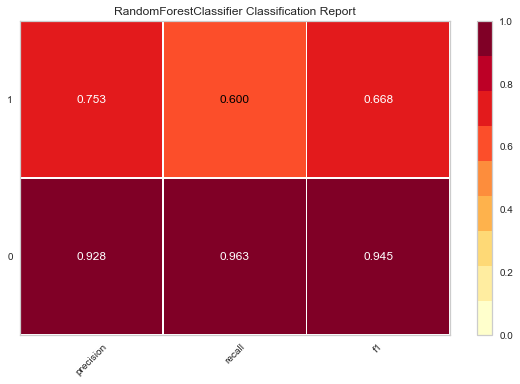

In [100]:
# %matplotlib notebook
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(RandomForestClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
viz.show(outpath="C:/Users/TreyG/Desktop/Machine-learning-challenge/Images/randomforest_classificationreport.png")

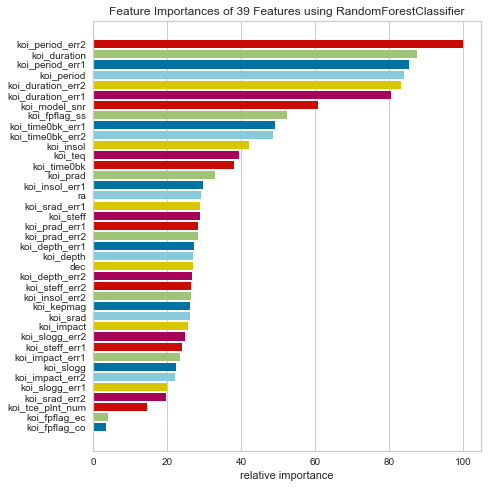

In [102]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz
set_palette('yellowbrick')
viz = FeatureImportances(rf, size=(500, 500))
viz.fit(X_train, y_train)
viz.show(outpath="C:/Users/TreyG/Desktop/Machine-learning-challenge/Images/randomforest_classificationreport.png")

# Save the Model

In [31]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'randomforest.sav'
joblib.dump(model2, 'randomforest.sav')

['logistic.sav']